# Experiment 2: Results across values of $\alpha$ in higher dimensions

In this notebook, we show results corresponding to Experiment 2, described in the thesis report. Specifically, we present the fidelities and accuracies of the copies (SNN, MNN, LNN, and GB, appearing in this order for each black box) across different values of $\alpha \in \{0,0.25,0.5,0.75,1,1.25\}$ in the UCI high-dimensional datasets, for each of the 3 different black box models considered in the experiment, comparing them to the corresponding metrics achieved by the hard copies. All copies were trained on the same 1,000,000 synthetic samples generated with Algorithm 2.

As a remark, all metrics and plots shown below have been averaged across five different seeds (41, 42, 43, 44, and 45), aiming to increase their reliability and significance.

In [1]:
# All necessary imports
import numpy as np
import os
import pandas as pd
import types
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from time import perf_counter
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.colors as mcolors
import pickle
import random
from tensorflow.keras.models import save_model, load_model
from tensorflow.keras import Model as KerasModel
from scipy.interpolate import interp1d

original_cwd = os.getcwd()
os.chdir('../utils')
from utils import *
os.chdir(original_cwd)

In [2]:
# Set the seed
seed = 42
random.seed(seed)
np.random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
tf.random.set_seed(seed)
tf.keras.utils.set_random_seed(seed)
tf.config.experimental.enable_op_determinism()

# Create a wrapper for our Neural network black boxes
def bbmodelW(x):
    if isinstance(bbmodel, tf.keras.models.Model):
        return np.where(bbmodel(x) > 0.5, 1, -1).flatten()
    return np.where(bbmodel.predict(x) > 0.5, 1, -1).flatten()

## Breast cancer dataset

### Black box 1: Random Forest classifier

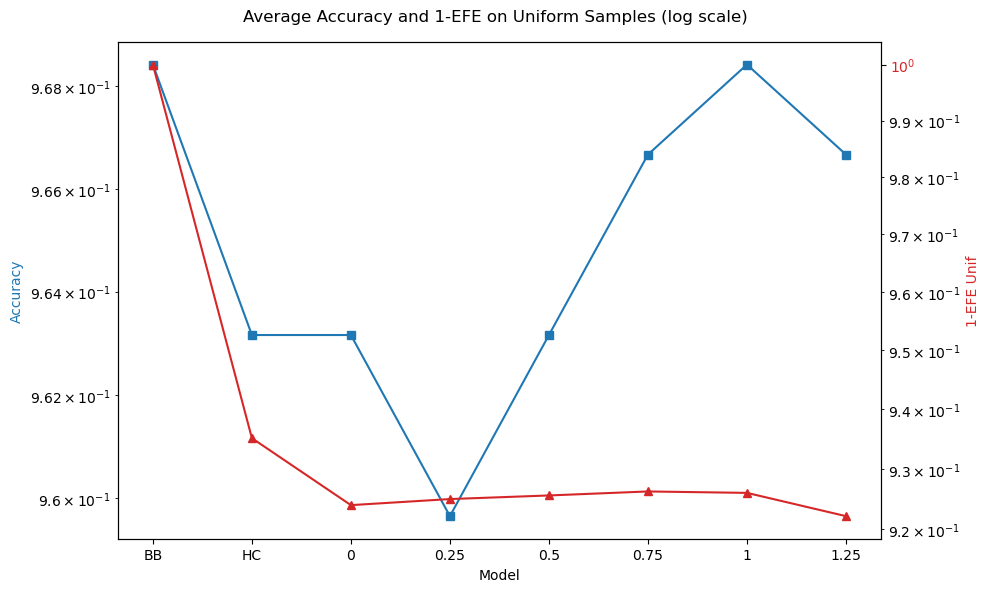


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.968421        0.000000    1.000000
   HC        0.963158        0.064881    0.935119
    0        0.963158        0.076057    0.923943
 0.25        0.959649        0.075050    0.924950
  0.5        0.963158        0.074450    0.925550
 0.75        0.966667        0.073785    0.926215
    1        0.968421        0.074022    0.925978
 1.25        0.966667        0.077882    0.922118


In [3]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS4_1_1_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

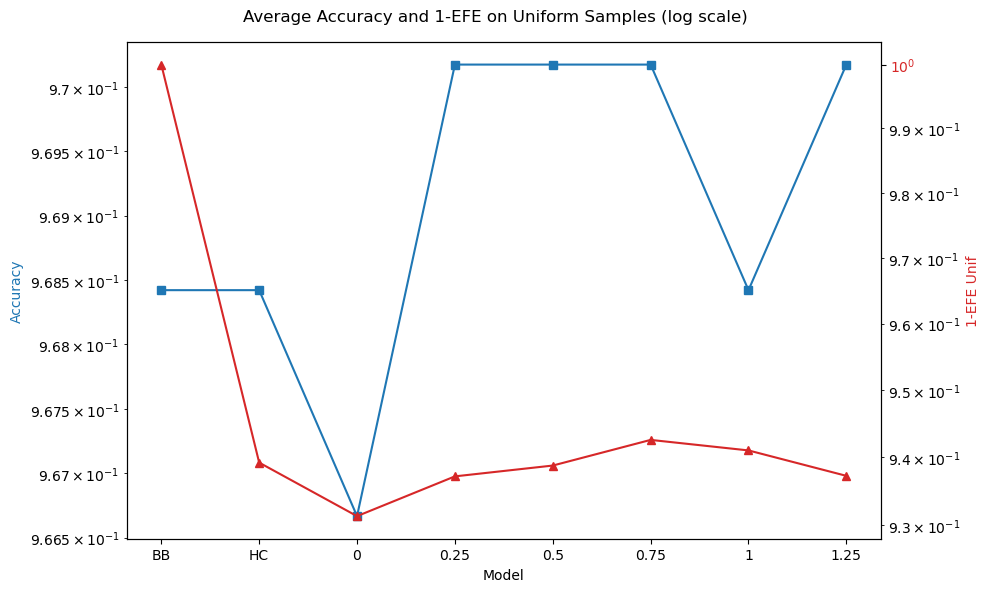


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.968421        0.000000    1.000000
   HC        0.968421        0.060815    0.939185
    0        0.966667        0.068708    0.931292
 0.25        0.970175        0.062850    0.937150
  0.5        0.970175        0.061252    0.938748
 0.75        0.970175        0.057447    0.942553
    1        0.968421        0.059010    0.940990
 1.25        0.970175        0.062774    0.937226


In [4]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS4_1_2_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

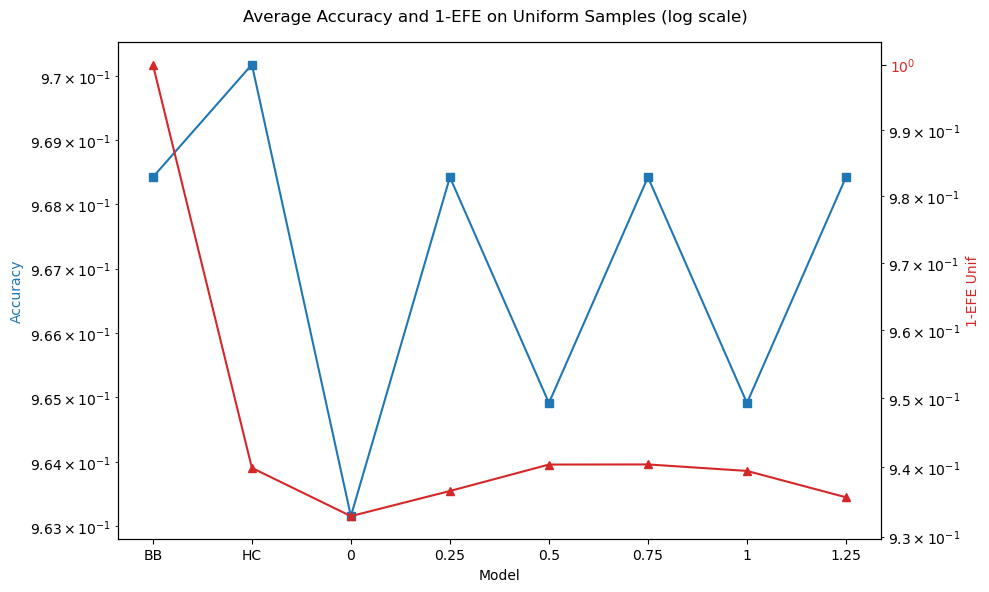


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.968421        0.000000    1.000000
   HC        0.970175        0.060119    0.939881
    0        0.963158        0.067062    0.932938
 0.25        0.968421        0.063448    0.936552
  0.5        0.964912        0.059635    0.940365
 0.75        0.968421        0.059618    0.940382
    1        0.964912        0.060553    0.939447
 1.25        0.968421        0.064353    0.935647


In [5]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS4_1_3_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

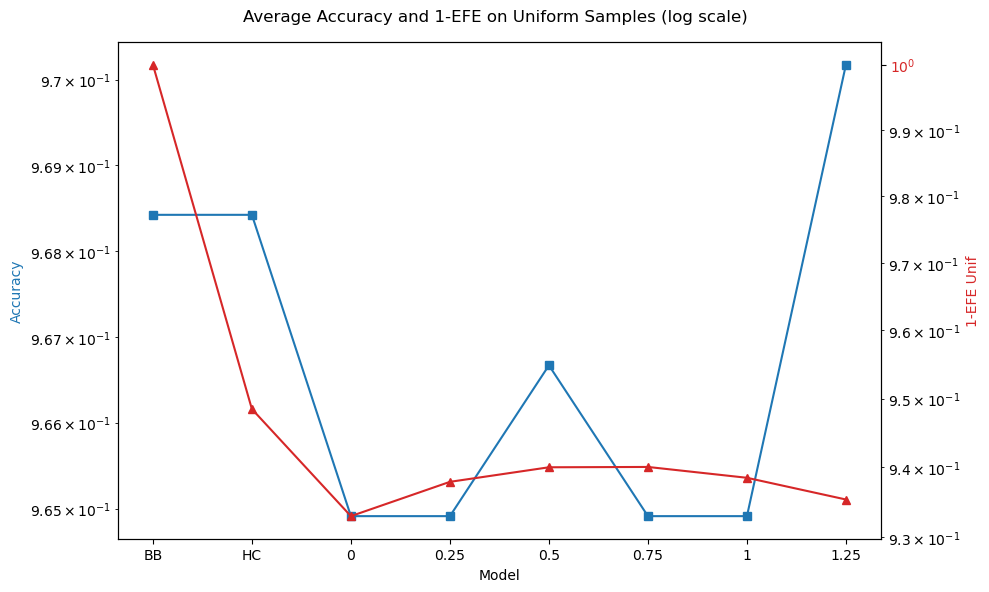


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.968421        0.000000    1.000000
   HC        0.968421        0.051528    0.948472
    0        0.964912        0.067000    0.933000
 0.25        0.964912        0.062072    0.937928
  0.5        0.966667        0.059973    0.940027
 0.75        0.964912        0.059925    0.940075
    1        0.964912        0.061488    0.938512
 1.25        0.970175        0.064614    0.935386


In [6]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS4_1_4_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

### Black box 2: Gradient Boosting classifier

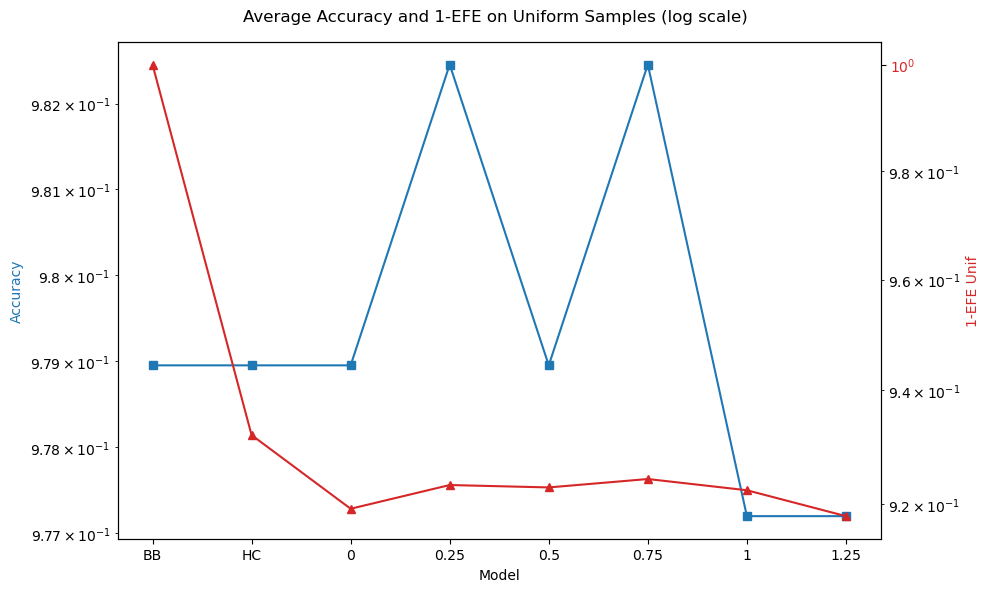


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.978947        0.000000    1.000000
   HC        0.978947        0.067934    0.932066
    0        0.978947        0.080881    0.919119
 0.25        0.982456        0.076733    0.923267
  0.5        0.978947        0.077152    0.922848
 0.75        0.982456        0.075678    0.924322
    1        0.977193        0.077645    0.922355
 1.25        0.977193        0.082171    0.917829


In [7]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS4_2_1_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

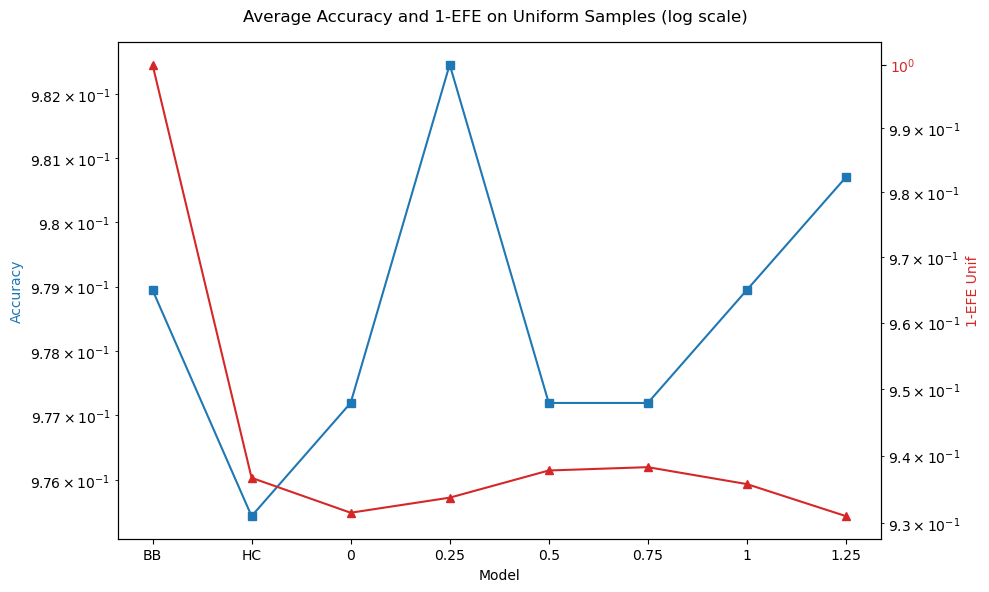


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.978947        0.000000    1.000000
   HC        0.975439        0.063296    0.936704
    0        0.977193        0.068454    0.931546
 0.25        0.982456        0.066231    0.933769
  0.5        0.977193        0.062206    0.937794
 0.75        0.977193        0.061713    0.938287
    1        0.978947        0.064223    0.935777
 1.25        0.980702        0.068956    0.931044


In [8]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS4_2_2_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

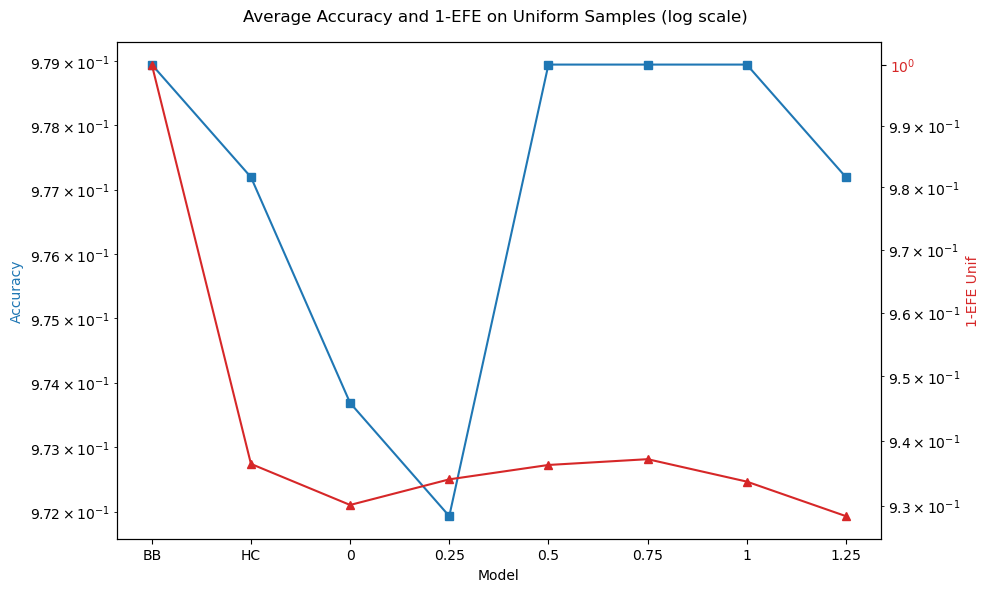


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.978947        0.000000    1.000000
   HC        0.977193        0.063600    0.936400
    0        0.973684        0.069904    0.930096
 0.25        0.971930        0.065975    0.934025
  0.5        0.978947        0.063762    0.936238
 0.75        0.978947        0.062870    0.937130
    1        0.978947        0.066320    0.933680
 1.25        0.977193        0.071613    0.928387


In [9]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS4_2_3_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

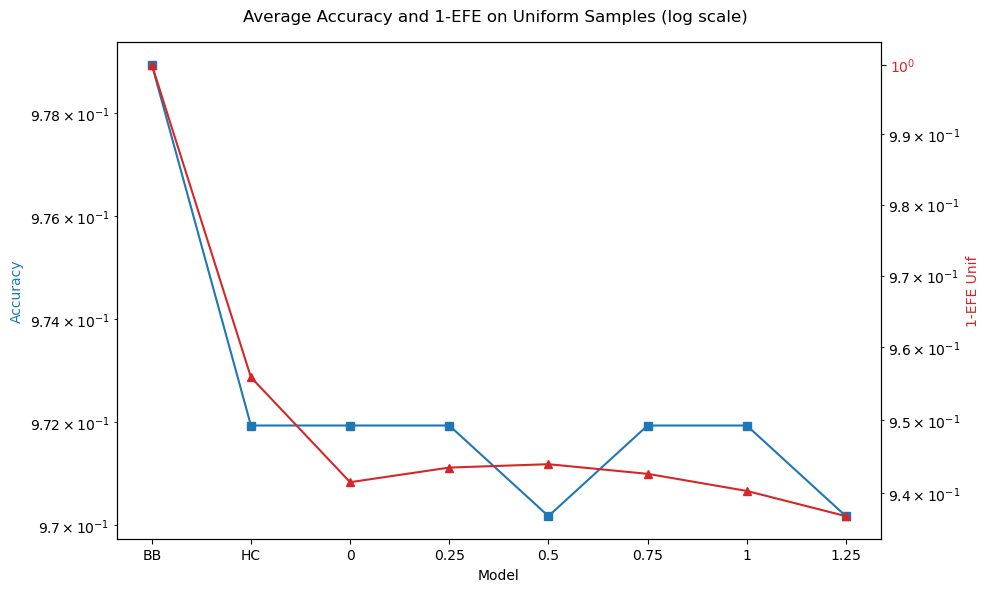


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.978947        0.000000    1.000000
   HC        0.971930        0.044127    0.955873
    0        0.971930        0.058492    0.941508
 0.25        0.971930        0.056503    0.943497
  0.5        0.970175        0.056043    0.943957
 0.75        0.971930        0.057355    0.942645
    1        0.971930        0.059676    0.940324
 1.25        0.970175        0.063093    0.936907


In [10]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS4_2_4_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

### Black box 3: Neural Network classifier

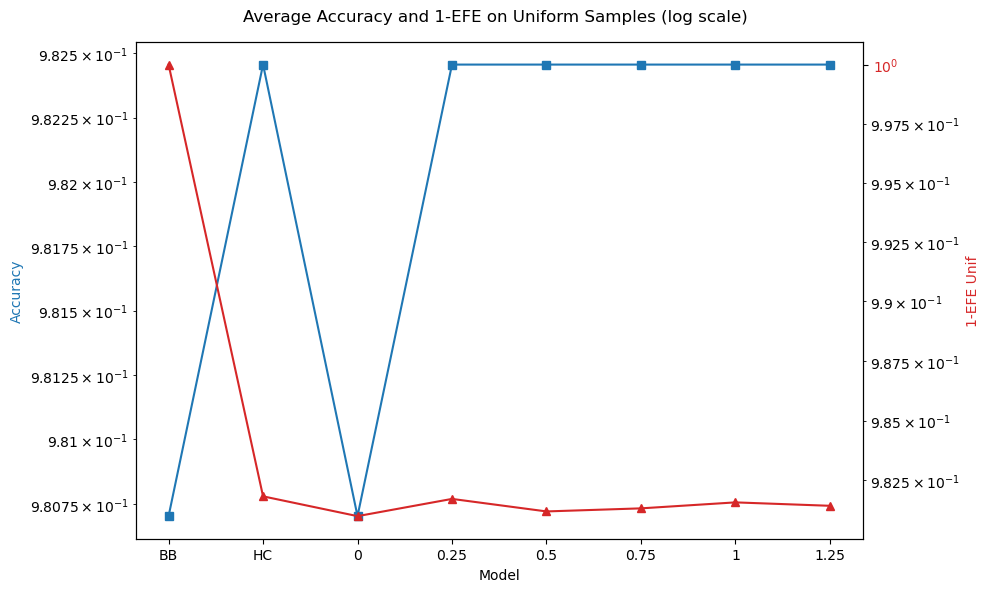


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.980702        0.000000    1.000000
   HC        0.982456        0.018164    0.981836
    0        0.980702        0.018990    0.981010
 0.25        0.982456        0.018271    0.981729
  0.5        0.982456        0.018793    0.981207
 0.75        0.982456        0.018665    0.981335
    1        0.982456        0.018416    0.981584
 1.25        0.982456        0.018558    0.981442


In [11]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS4_3_1_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

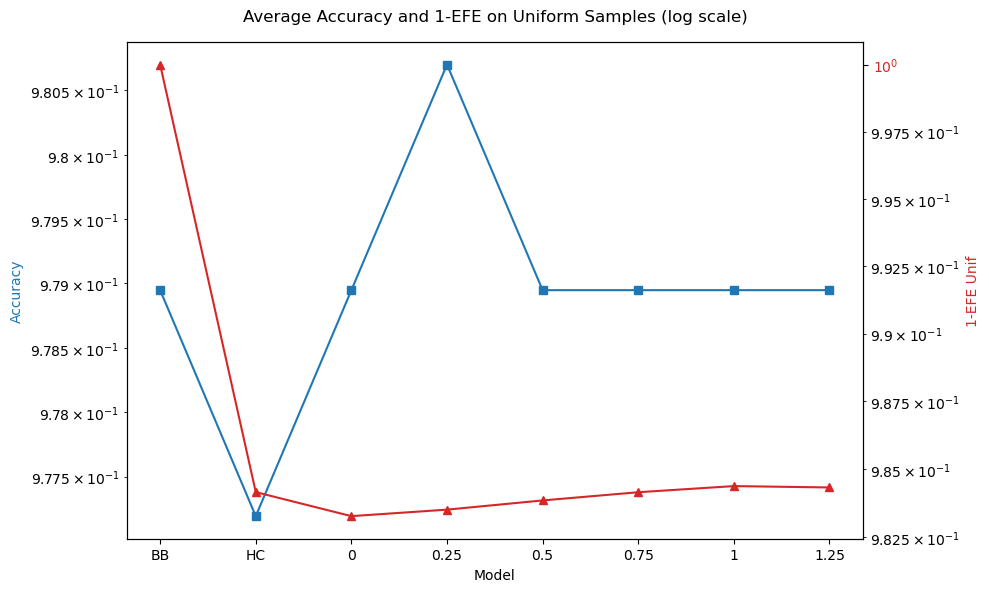


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.978947        0.000000    1.000000
   HC        0.977193        0.015851    0.984149
    0        0.978947        0.016735    0.983265
 0.25        0.980702        0.016496    0.983504
  0.5        0.978947        0.016157    0.983843
 0.75        0.978947        0.015855    0.984145
    1        0.978947        0.015630    0.984370
 1.25        0.978947        0.015680    0.984320


In [12]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS4_3_2_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

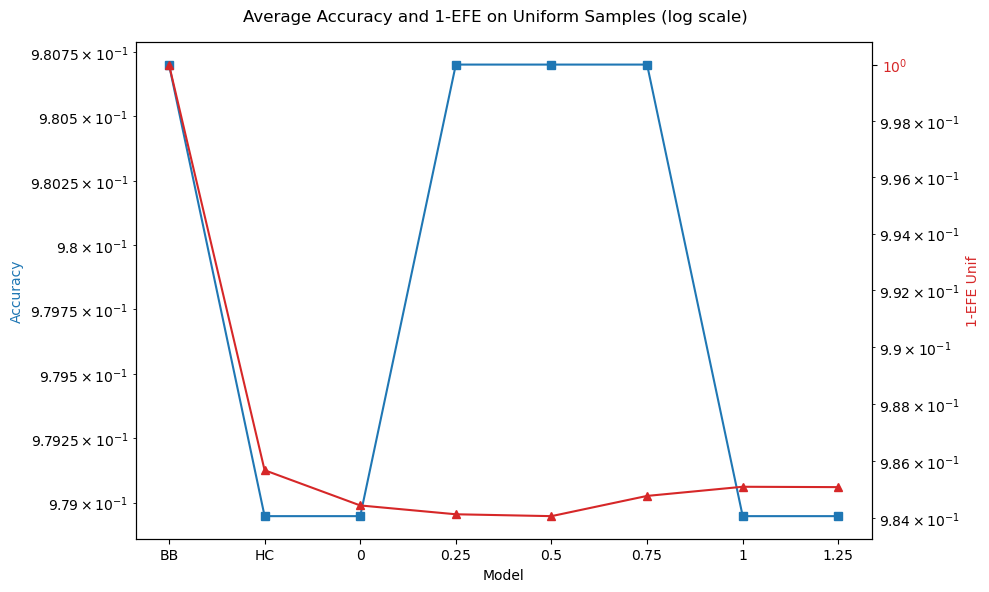


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.980702        0.000000    1.000000
   HC        0.978947        0.014331    0.985669
    0        0.978947        0.015566    0.984434
 0.25        0.980702        0.015875    0.984125
  0.5        0.980702        0.015940    0.984060
 0.75        0.980702        0.015232    0.984768
    1        0.978947        0.014911    0.985089
 1.25        0.978947        0.014924    0.985076


In [13]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS4_3_3_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

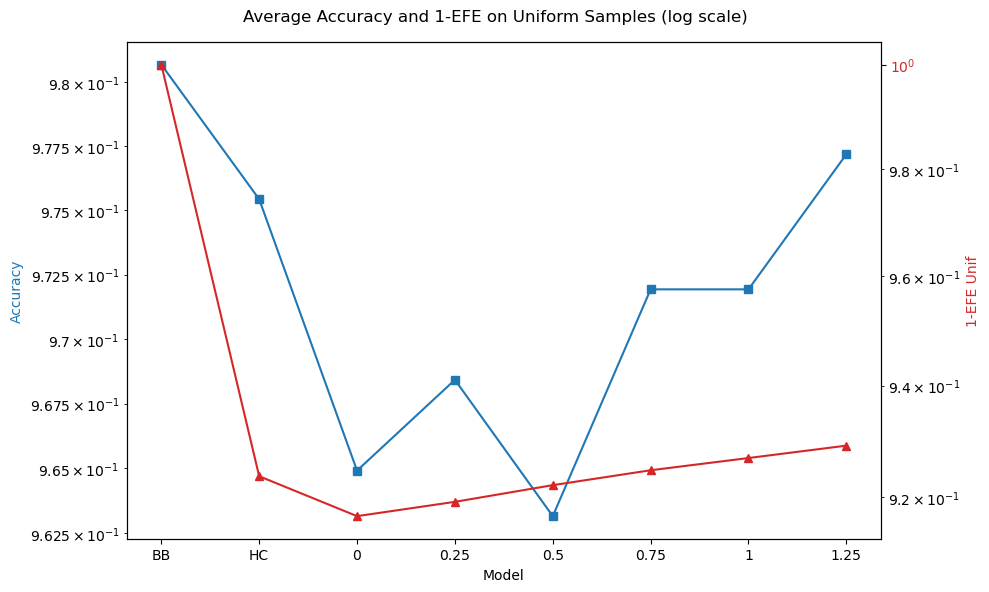


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.980702        0.000000    1.000000
   HC        0.975439        0.076267    0.923733
    0        0.964912        0.083347    0.916653
 0.25        0.968421        0.080817    0.919183
  0.5        0.963158        0.077858    0.922142
 0.75        0.971930        0.075205    0.924795
    1        0.971930        0.073023    0.926977
 1.25        0.977193        0.070808    0.929192


In [14]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS4_3_4_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

## Rice dataset

### Black box 1: Random Forest classifier

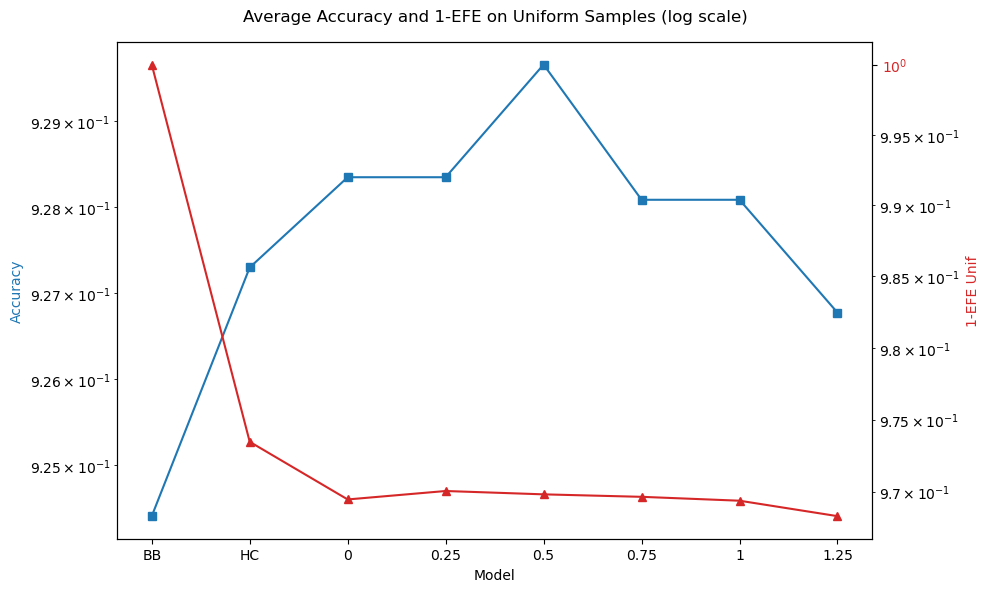


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.924409        0.000000    1.000000
   HC        0.927297        0.026550    0.973450
    0        0.928346        0.030544    0.969456
 0.25        0.928346        0.029960    0.970040
  0.5        0.929659        0.030191    0.969809
 0.75        0.928084        0.030362    0.969638
    1        0.928084        0.030631    0.969369
 1.25        0.926772        0.031698    0.968302


In [15]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS5_1_1_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

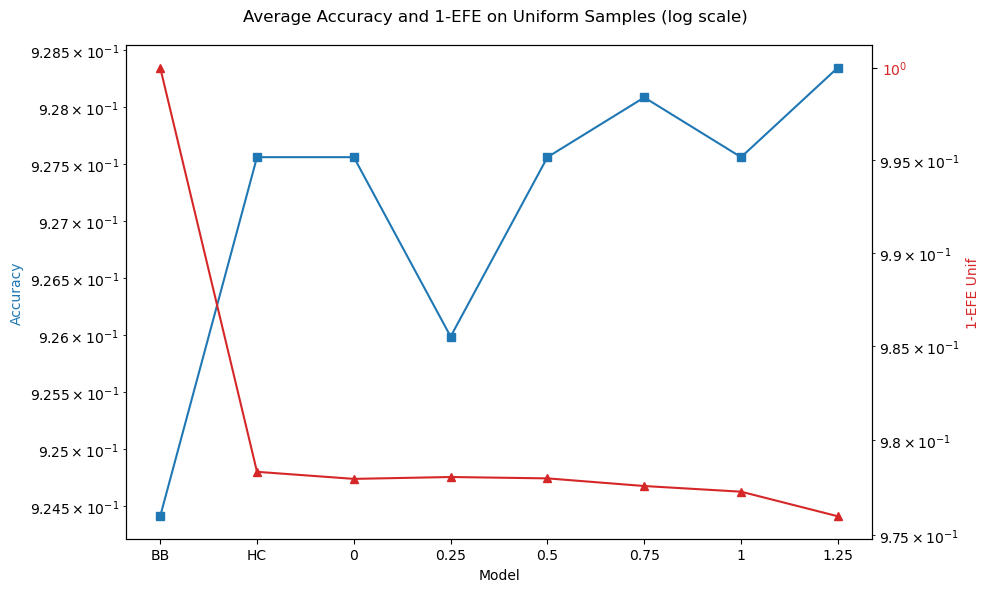


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.924409        0.000000    1.000000
   HC        0.927559        0.021668    0.978332
    0        0.927559        0.022042    0.977958
 0.25        0.925984        0.021943    0.978057
  0.5        0.927559        0.022015    0.977985
 0.75        0.928084        0.022421    0.977579
    1        0.927559        0.022720    0.977280
 1.25        0.928346        0.024022    0.975978


In [16]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS5_1_2_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

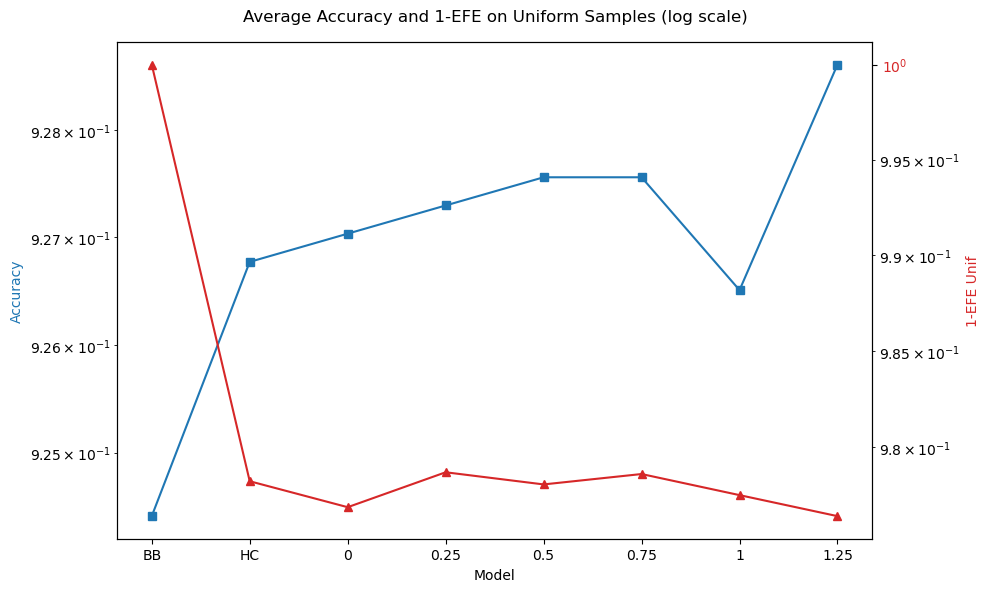


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.924409        0.000000    1.000000
   HC        0.926772        0.021748    0.978252
    0        0.927034        0.023087    0.976913
 0.25        0.927297        0.021285    0.978715
  0.5        0.927559        0.021913    0.978087
 0.75        0.927559        0.021376    0.978624
    1        0.926509        0.022465    0.977535
 1.25        0.928609        0.023549    0.976451


In [17]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS5_1_3_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

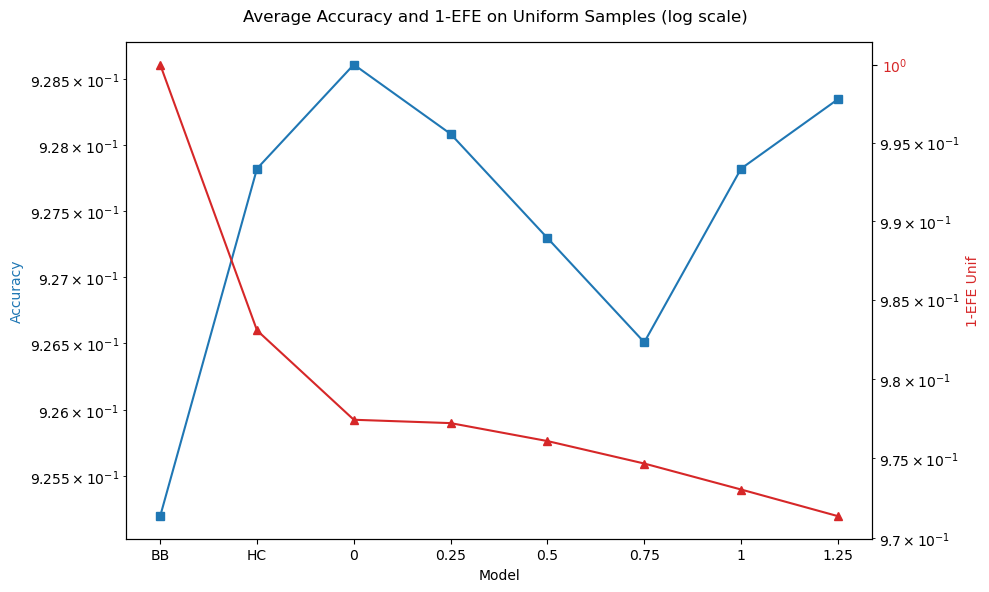


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.925197        0.000000    1.000000
   HC        0.927822        0.016948    0.983052
    0        0.928609        0.022582    0.977418
 0.25        0.928084        0.022793    0.977207
  0.5        0.927297        0.023921    0.976079
 0.75        0.926509        0.025329    0.974671
    1        0.927822        0.026957    0.973043
 1.25        0.928346        0.028622    0.971378


In [18]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS5_1_4_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

### Black box 2: Gradient Boosting classifier

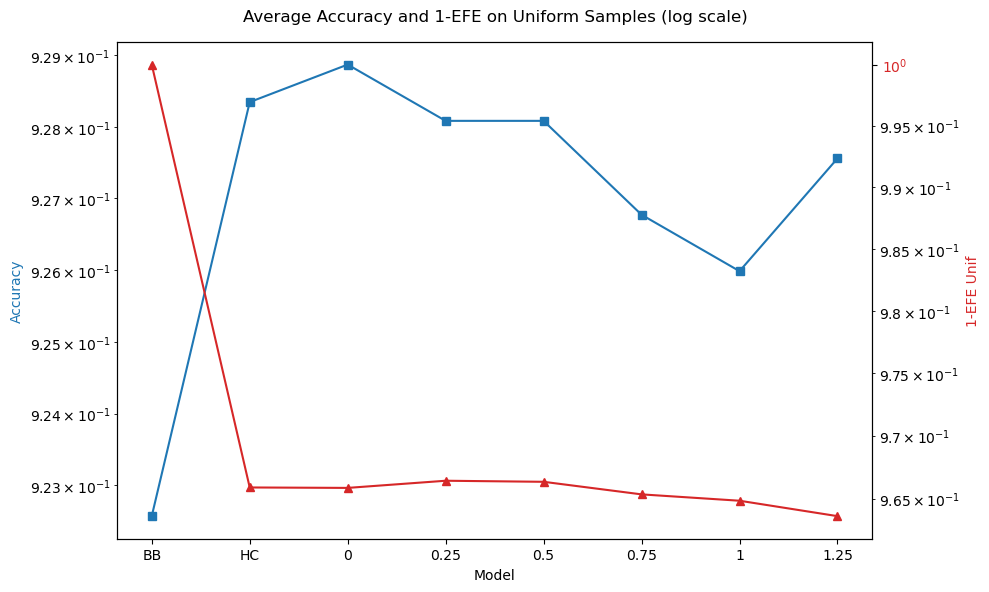


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.922572        0.000000    1.000000
   HC        0.928346        0.034112    0.965888
    0        0.928871        0.034147    0.965853
 0.25        0.928084        0.033579    0.966421
  0.5        0.928084        0.033664    0.966336
 0.75        0.926772        0.034660    0.965340
    1        0.925984        0.035164    0.964836
 1.25        0.927559        0.036383    0.963617


In [19]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS5_2_1_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

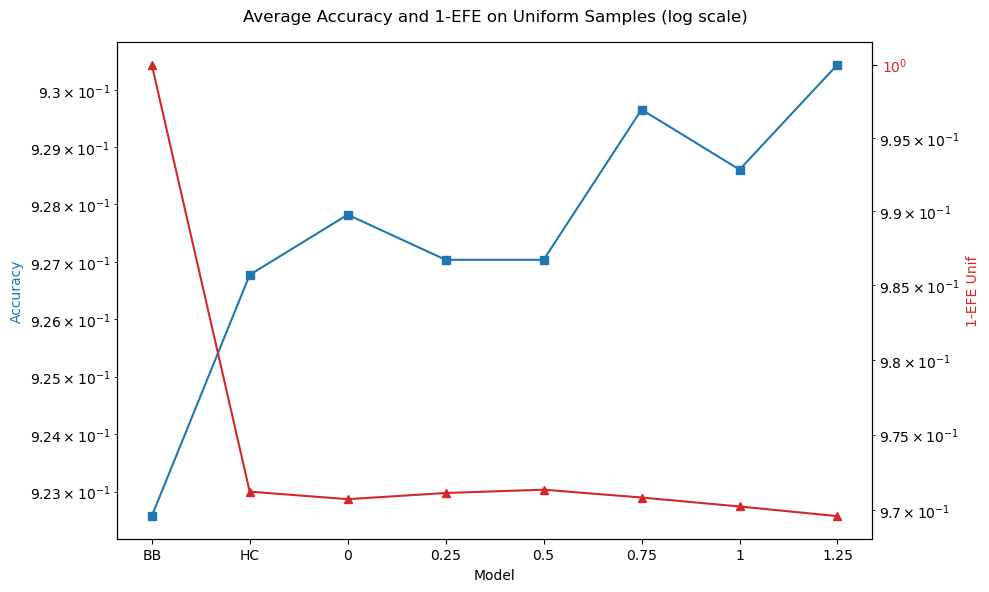


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.922572        0.000000    1.000000
   HC        0.926772        0.028795    0.971205
    0        0.927822        0.029295    0.970705
 0.25        0.927034        0.028885    0.971115
  0.5        0.927034        0.028666    0.971334
 0.75        0.929659        0.029186    0.970814
    1        0.928609        0.029781    0.970219
 1.25        0.930446        0.030422    0.969578


In [20]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS5_2_2_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

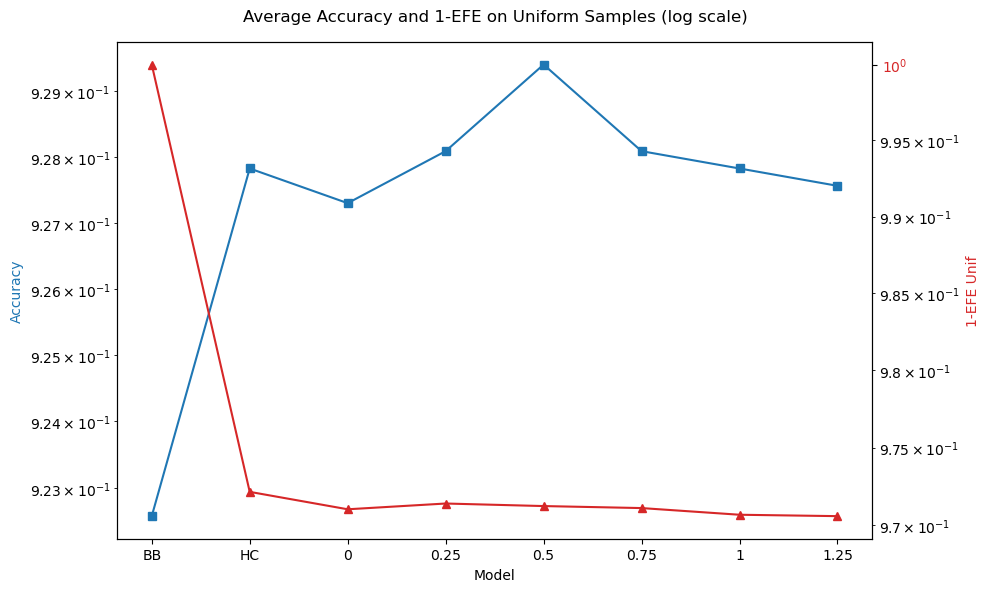


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.922572        0.000000    1.000000
   HC        0.927822        0.027854    0.972146
    0        0.927297        0.028973    0.971027
 0.25        0.928084        0.028603    0.971397
  0.5        0.929396        0.028766    0.971234
 0.75        0.928084        0.028895    0.971105
    1        0.927822        0.029324    0.970676
 1.25        0.927559        0.029413    0.970587


In [21]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS5_2_3_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

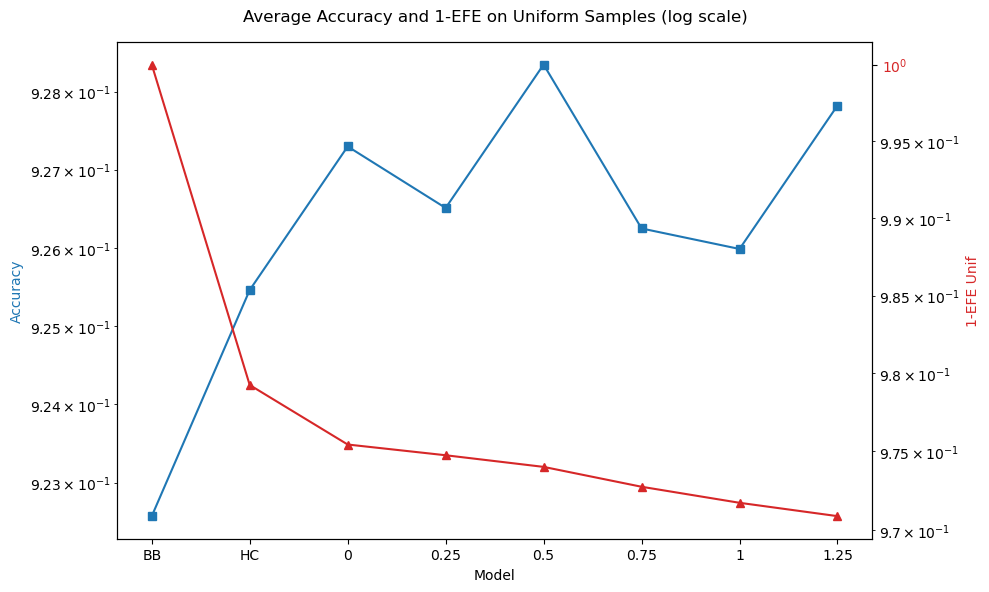


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.922572        0.000000    1.000000
   HC        0.925459        0.020750    0.979250
    0        0.927297        0.024555    0.975445
 0.25        0.926509        0.025240    0.974760
  0.5        0.928346        0.025982    0.974018
 0.75        0.926247        0.027247    0.972753
    1        0.925984        0.028268    0.971732
 1.25        0.927822        0.029116    0.970884


In [22]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS5_2_4_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

### Black box 3: Neural Network classifier

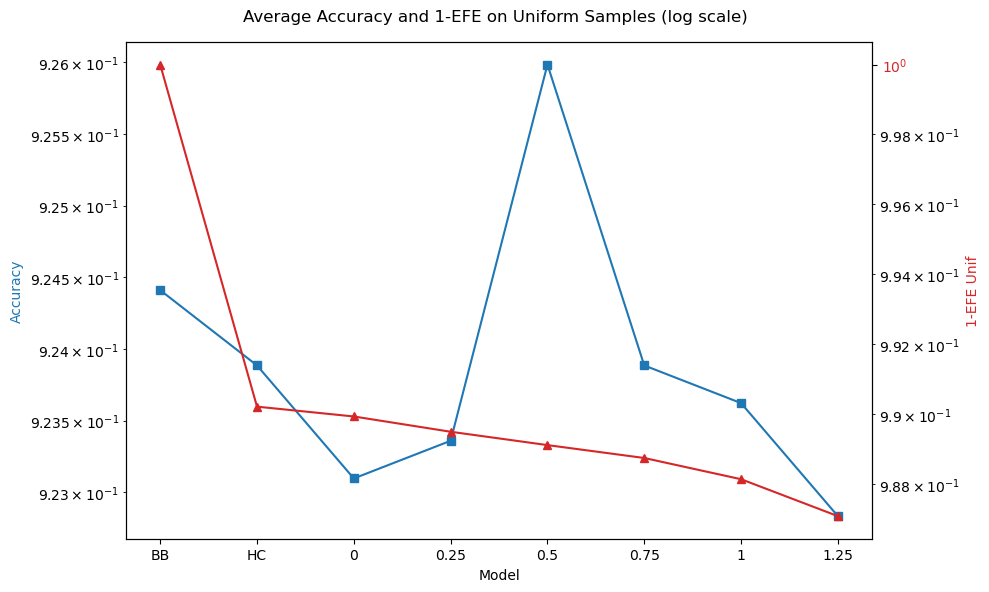


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.924409        0.000000    1.000000
   HC        0.923885        0.009788    0.990212
    0        0.923097        0.010067    0.989933
 0.25        0.923360        0.010502    0.989498
  0.5        0.925984        0.010882    0.989118
 0.75        0.923885        0.011249    0.988751
    1        0.923622        0.011852    0.988148
 1.25        0.922835        0.012900    0.987100


In [23]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS5_3_1_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

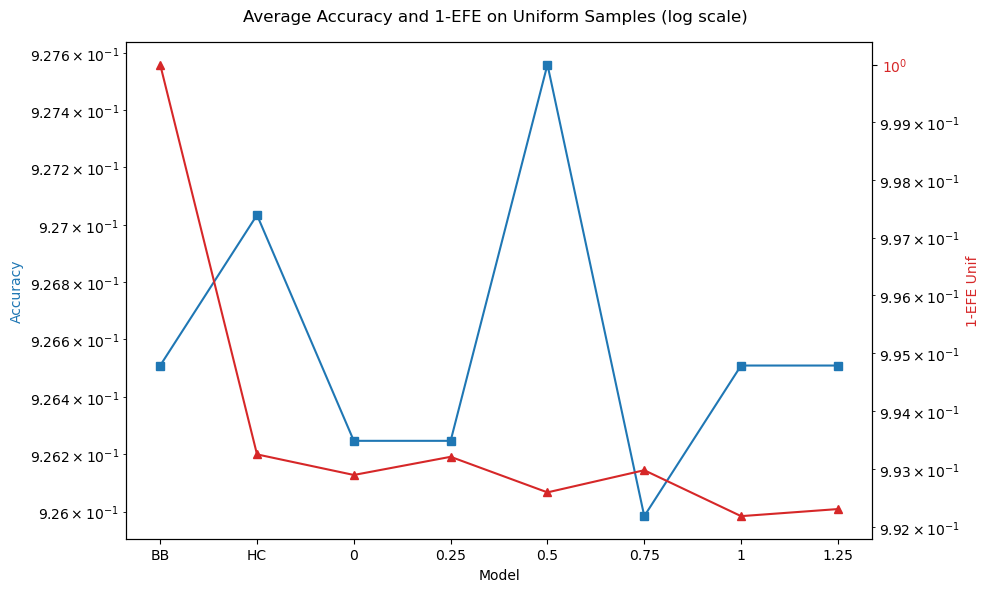


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.926509        0.000000    1.000000
   HC        0.927034        0.006746    0.993254
    0        0.926247        0.007101    0.992899
 0.25        0.926247        0.006788    0.993212
  0.5        0.927559        0.007401    0.992599
 0.75        0.925984        0.007019    0.992981
    1        0.926509        0.007810    0.992190
 1.25        0.926509        0.007688    0.992312


In [24]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS5_3_2_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

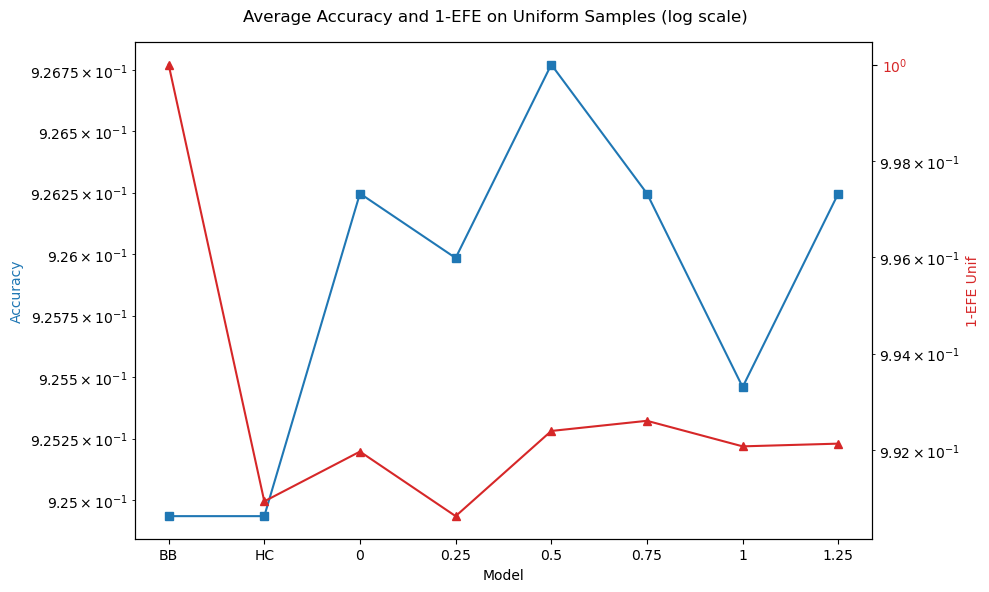


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.924934        0.000000    1.000000
   HC        0.924934        0.009054    0.990946
    0        0.926247        0.008026    0.991974
 0.25        0.925984        0.009359    0.990641
  0.5        0.926772        0.007600    0.992400
 0.75        0.926247        0.007390    0.992610
    1        0.925459        0.007918    0.992082
 1.25        0.926247        0.007862    0.992138


In [25]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS5_3_3_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

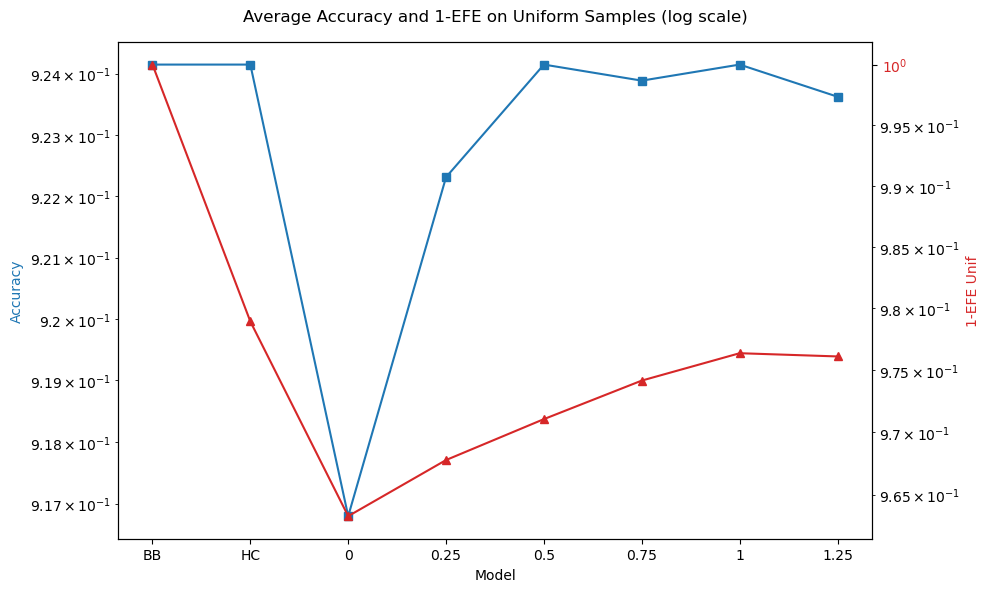


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.924147        0.000000    1.000000
   HC        0.924147        0.021054    0.978946
    0        0.916798        0.036714    0.963286
 0.25        0.922310        0.032226    0.967774
  0.5        0.924147        0.028940    0.971060
 0.75        0.923885        0.025835    0.974165
    1        0.924147        0.023625    0.976375
 1.25        0.923622        0.023886    0.976114


In [26]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS5_3_4_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

## Connectionist bench (mines vs rocks) dataset

### Black box 1: Random Forest classifier

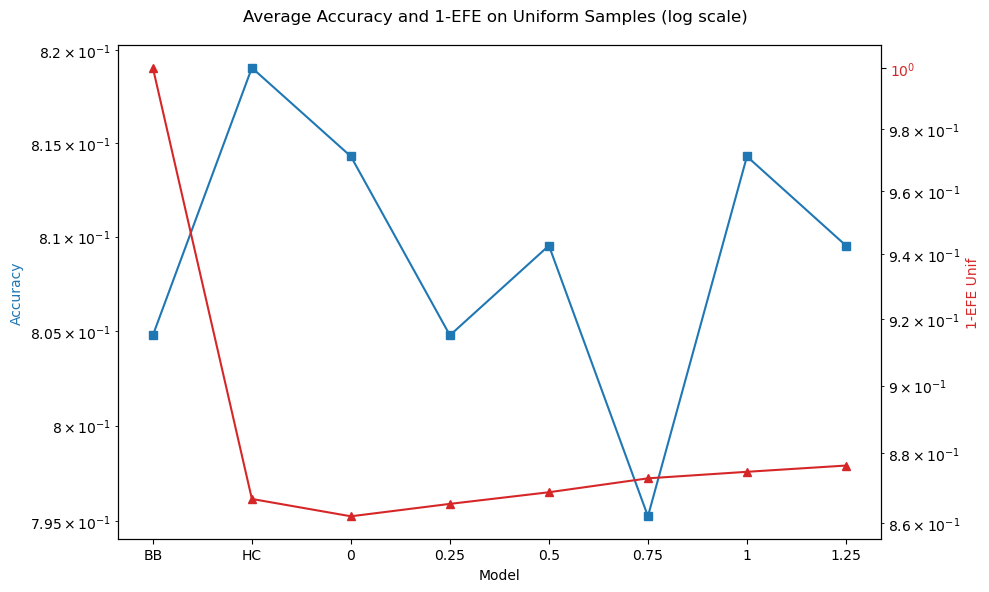


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.804762        0.000000    1.000000
   HC        0.819048        0.133167    0.866833
    0        0.814286        0.138134    0.861866
 0.25        0.804762        0.134578    0.865422
  0.5        0.809524        0.131237    0.868763
 0.75        0.795238        0.127222    0.872778
    1        0.814286        0.125333    0.874667
 1.25        0.809524        0.123517    0.876483


In [27]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS6_1_1_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

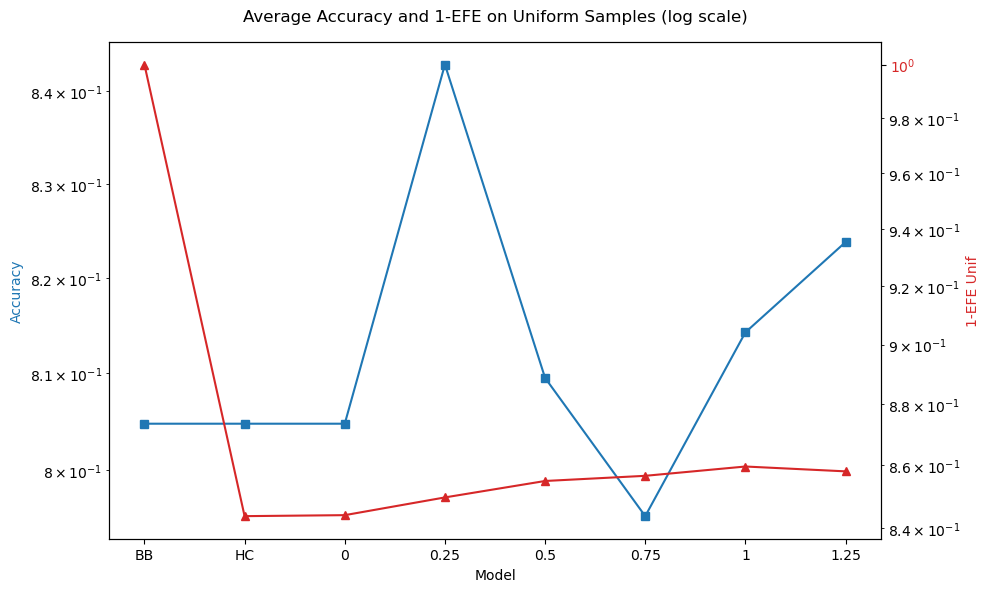


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.804762        0.000000    1.000000
   HC        0.804762        0.156303    0.843697
    0        0.804762        0.155989    0.844011
 0.25        0.842857        0.150337    0.849663
  0.5        0.809524        0.145064    0.854936
 0.75        0.795238        0.143398    0.856602
    1        0.814286        0.140394    0.859606
 1.25        0.823810        0.141960    0.858040


In [28]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS6_1_2_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

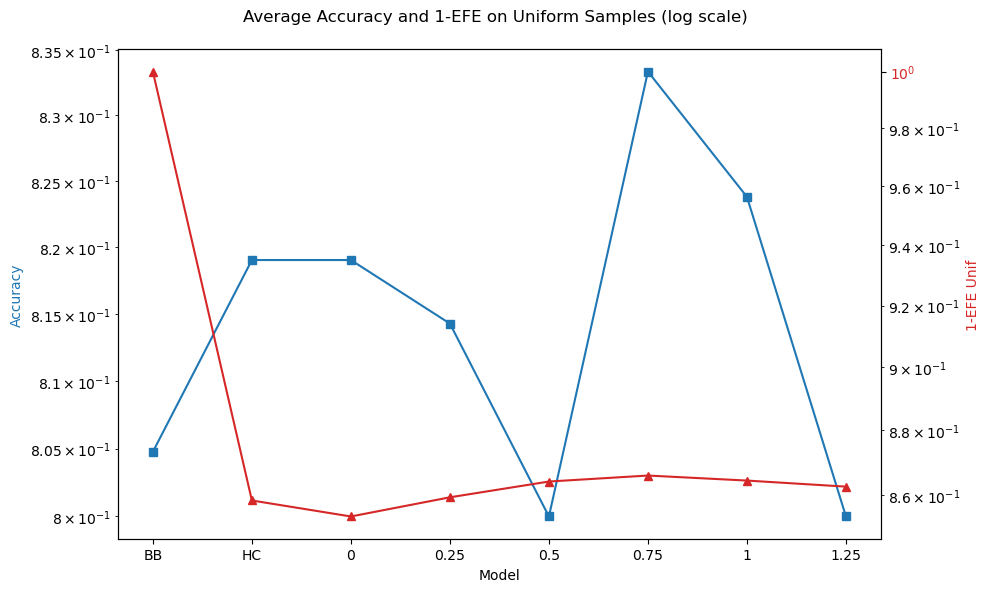


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.804762        0.000000    1.000000
   HC        0.819048        0.141722    0.858278
    0        0.819048        0.146602    0.853398
 0.25        0.814286        0.140751    0.859249
  0.5        0.800000        0.135909    0.864091
 0.75        0.833333        0.134061    0.865939
    1        0.823810        0.135612    0.864388
 1.25        0.800000        0.137476    0.862524


In [29]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS6_1_3_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

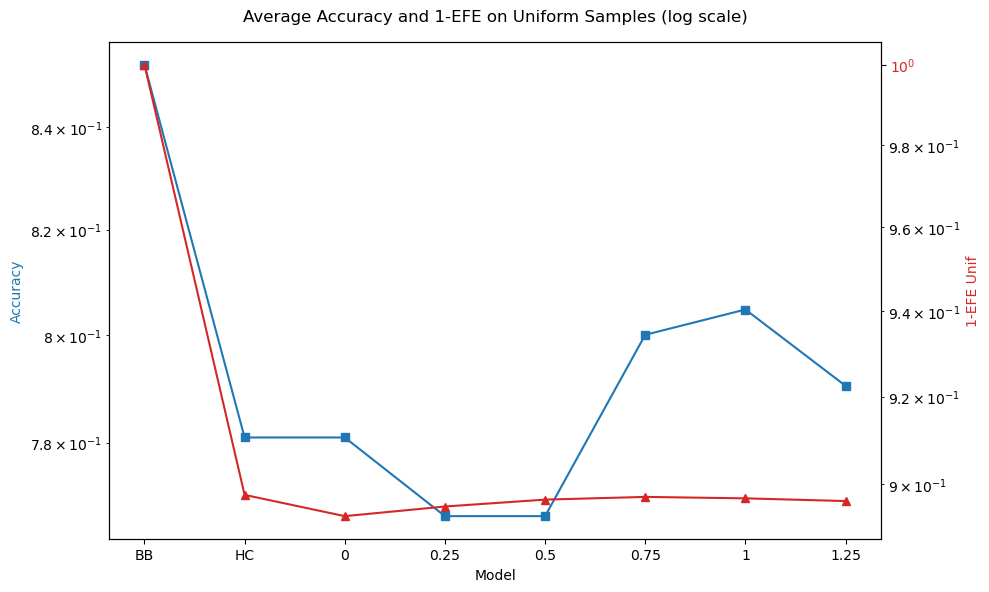


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.852381        0.000000    1.000000
   HC        0.780952        0.102438    0.897562
    0        0.780952        0.107216    0.892784
 0.25        0.766667        0.105052    0.894948
  0.5        0.766667        0.103503    0.896497
 0.75        0.800000        0.102892    0.897108
    1        0.804762        0.103218    0.896782
 1.25        0.790476        0.103824    0.896176


In [30]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS6_1_4_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

### Black box 2: Gradient Boosting classifier

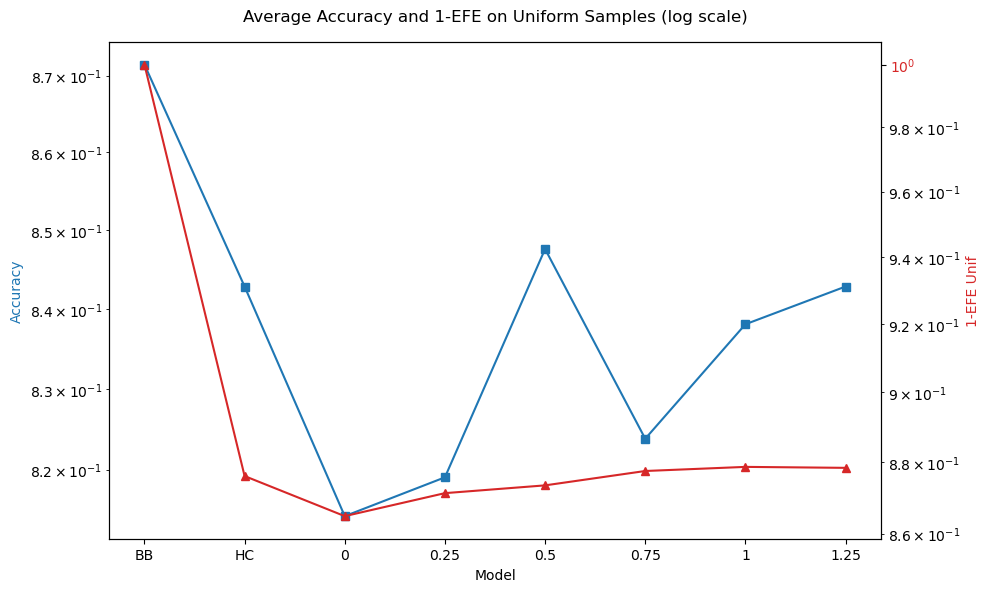


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.871429        0.000000    1.000000
   HC        0.842857        0.123947    0.876053
    0        0.814286        0.135166    0.864834
 0.25        0.819048        0.128745    0.871255
  0.5        0.847619        0.126564    0.873436
 0.75        0.823810        0.122519    0.877481
    1        0.838095        0.121357    0.878643
 1.25        0.842857        0.121628    0.878372


In [31]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS6_2_1_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

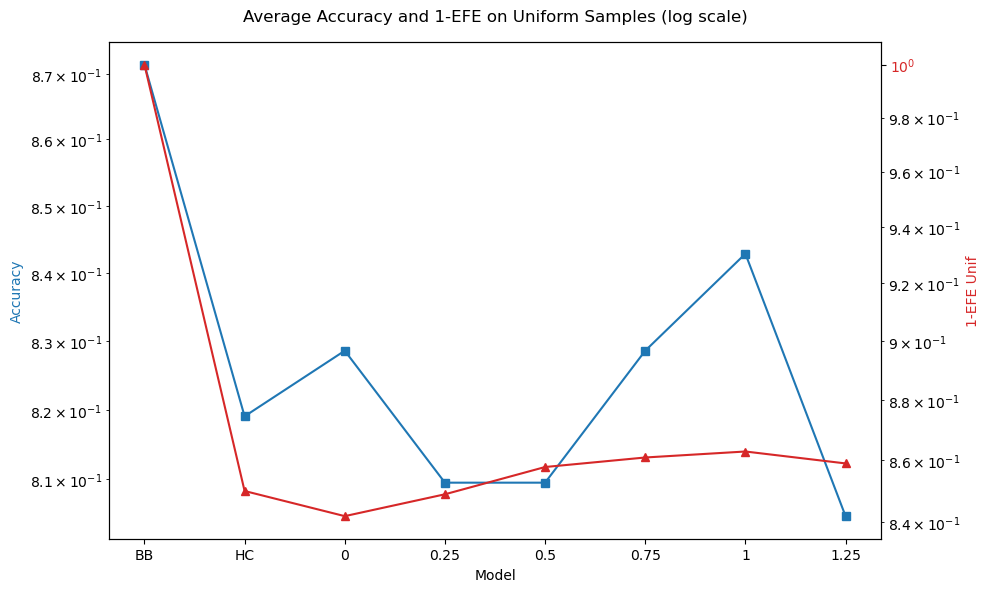


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.871429        0.000000    1.000000
   HC        0.819048        0.150053    0.849947
    0        0.828571        0.158162    0.841838
 0.25        0.809524        0.151116    0.848884
  0.5        0.809524        0.142246    0.857754
 0.75        0.828571        0.139124    0.860876
    1        0.842857        0.137158    0.862842
 1.25        0.804762        0.141071    0.858929


In [32]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS6_2_2_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

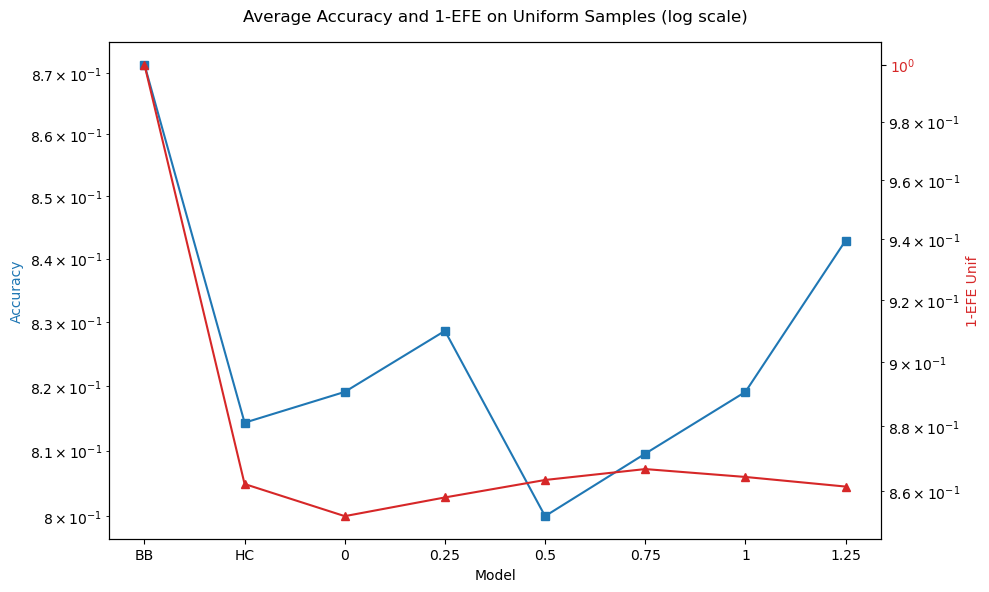


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.871429        0.000000    1.000000
   HC        0.814286        0.137910    0.862090
    0        0.819048        0.147650    0.852350
 0.25        0.828571        0.141992    0.858008
  0.5        0.800000        0.136675    0.863325
 0.75        0.809524        0.133336    0.866664
    1        0.819048        0.135752    0.864248
 1.25        0.842857        0.138682    0.861318


In [33]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS6_2_3_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

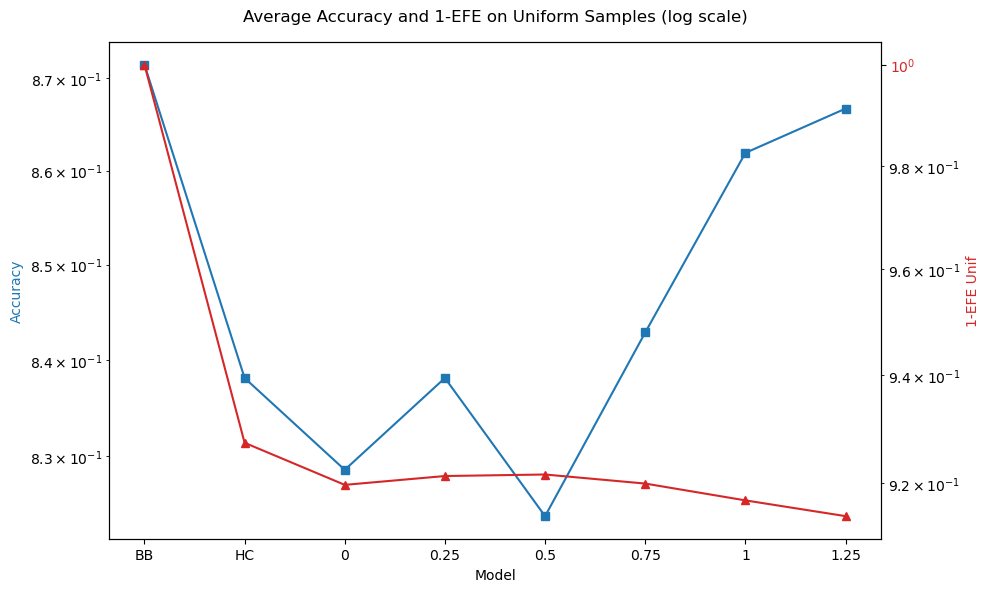


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.871429        0.000000    1.000000
   HC        0.838095        0.072624    0.927376
    0        0.828571        0.080370    0.919630
 0.25        0.838095        0.078749    0.921251
  0.5        0.823810        0.078469    0.921531
 0.75        0.842857        0.080133    0.919867
    1        0.861905        0.083211    0.916789
 1.25        0.866667        0.086087    0.913913


In [34]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS6_2_4_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

### Black box 3: Neural Network classifier

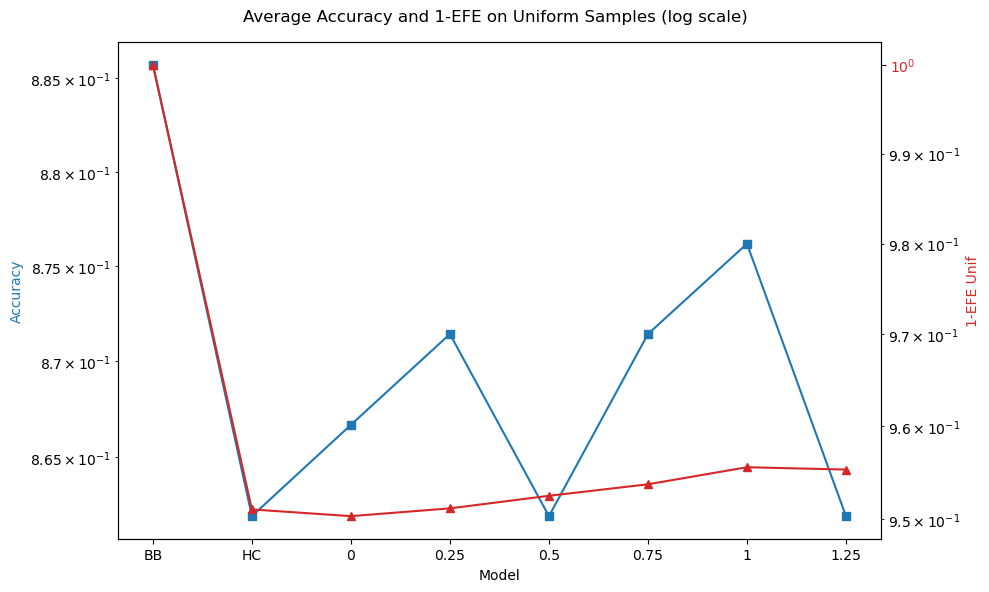


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.885714        0.000000    1.000000
   HC        0.861905        0.048962    0.951038
    0        0.866667        0.049682    0.950318
 0.25        0.871429        0.048847    0.951153
  0.5        0.861905        0.047496    0.952504
 0.75        0.871429        0.046260    0.953740
    1        0.876190        0.044423    0.955577
 1.25        0.861905        0.044672    0.955328


In [35]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS6_3_1_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

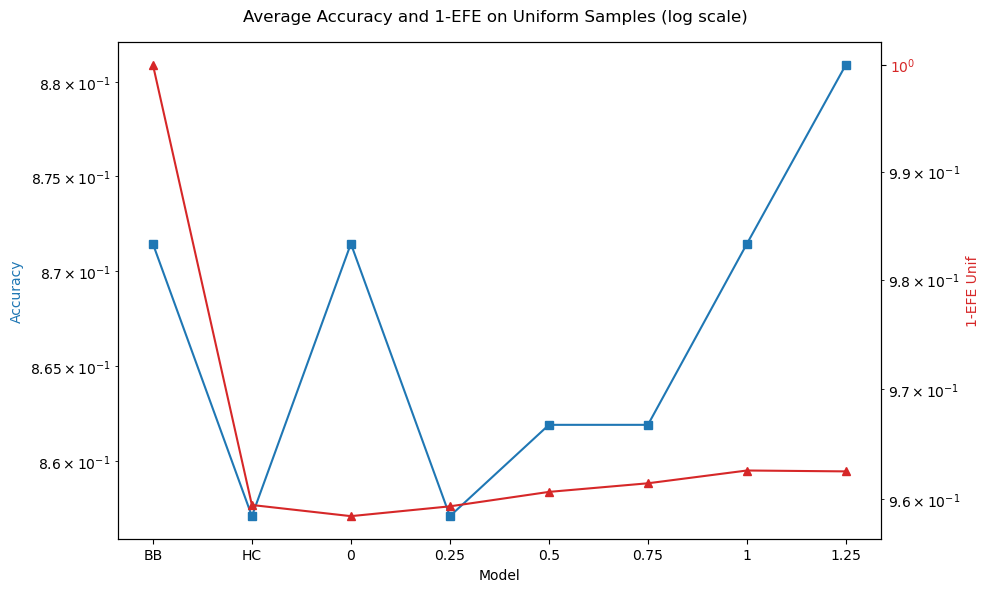


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.871429        0.000000    1.000000
   HC        0.857143        0.040536    0.959464
    0        0.871429        0.041540    0.958460
 0.25        0.857143        0.040656    0.959344
  0.5        0.861905        0.039354    0.960646
 0.75        0.861905        0.038576    0.961424
    1        0.871429        0.037421    0.962579
 1.25        0.880952        0.037501    0.962499


In [36]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS6_3_2_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

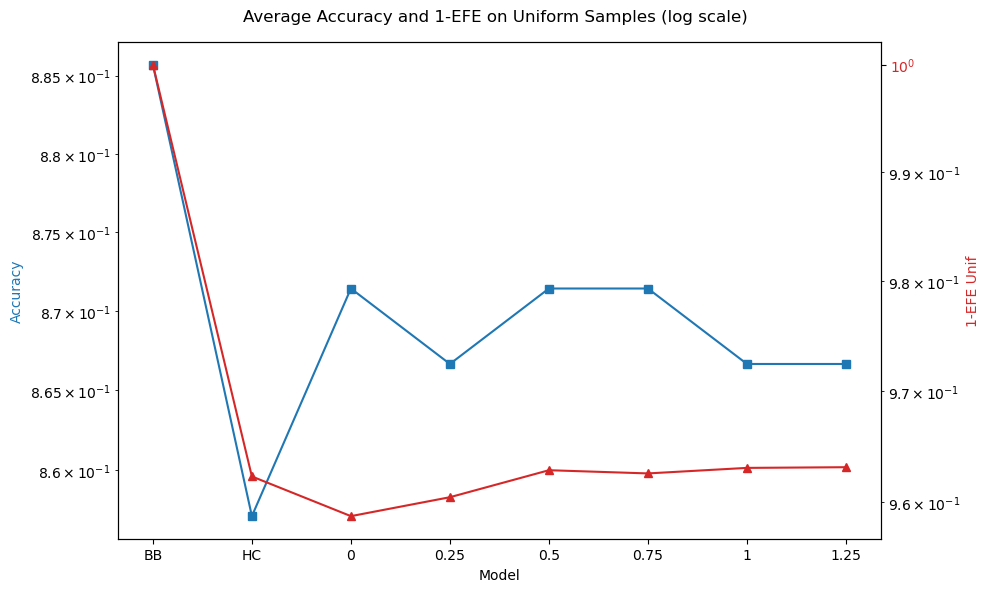


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.885714        0.000000    1.000000
   HC        0.857143        0.037723    0.962277
    0        0.871429        0.041281    0.958719
 0.25        0.866667        0.039585    0.960415
  0.5        0.871429        0.037162    0.962838
 0.75        0.871429        0.037450    0.962550
    1        0.866667        0.036952    0.963048
 1.25        0.866667        0.036891    0.963109


In [37]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS6_3_3_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)

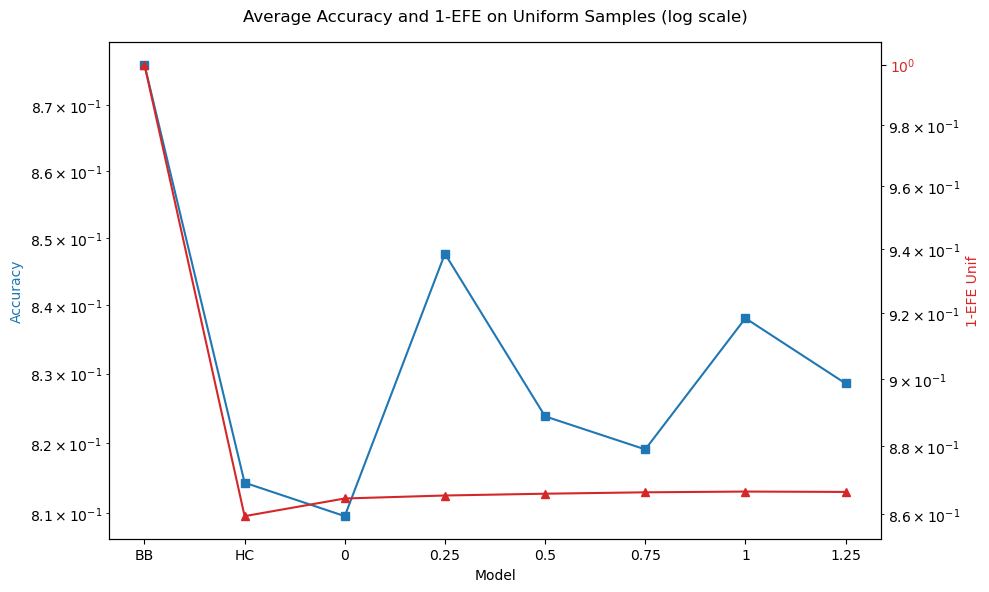


=== Average Accuracy and EFE Uniform Table ===
Model  Accuracy (avg)  EFE Unif (avg)  1-EFE Unif
   BB        0.876190        0.000000    1.000000
   HC        0.814286        0.140511    0.859489
    0        0.809524        0.135405    0.864595
 0.25        0.847619        0.134541    0.865459
  0.5        0.823810        0.134020    0.865980
 0.75        0.819048        0.133617    0.866383
    1        0.838095        0.133398    0.866602
 1.25        0.828571        0.133504    0.866496


In [38]:
acc_avg, efe_unif_avg = load_and_average_results("../results", "alpha_DS6_3_4_seed")
plot_avg_acc_vs_efe_unif(acc_avg, efe_unif_avg)